In [1]:
from pylab import rcParams

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
rcParams['figure.figsize'] = 8,6

### Исследуем датасет с фильмами 
https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [3]:
credits = pd.read_csv('tmdb-5000-movie-dataset/tmdb_5000_credits.csv')

In [4]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
print(type(credits.cast[0]))

<class 'str'>


In [7]:
print(type(credits.crew[0]))

<class 'str'>


In [8]:
movies = pd.read_csv('tmdb-5000-movie-dataset/tmdb_5000_movies.csv')

In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [10]:
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [11]:
print(type(movies.keywords[0]))

<class 'str'>


In [12]:
import json

In [13]:
# так как элементы series жанр, ключевые слова, страна-производитель являются строками, необходимо преобразовать данные
# сделано на основе наработок Sohier Dane 
# https://www.kaggle.com/sohier/getting-imdb-kernels-working-with-tmdb-data

def load_tmdb_movies(path):
    '''
    для преобразования series gendes, keywords, production_countries в формат json
    '''
    df = pd.read_csv(path)
    json_columns = ['genres', 'keywords', 'production_countries']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def load_tmdb_credits(path):
    '''
    для преобразования series crew в формат json
    '''
    df = pd.read_csv(path)
    json_columns = ['crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

def safe_access(container, index_values):
    '''
    словарь для стран-производителей и режиссеров, там где нет данных возращаем Nan
    '''
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

def get_director(crew_data):
    '''
    для заполнения режиссеров фильмов в credits
    '''
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])

def pipe_flatten_names(keywords):
    '''
    для преобразования в тип str каждого элемента keywords
    '''
    return '|'.join([x['name'] for x in keywords])

def convert_to_original_format(movies, credits):
    '''
    для преобразования данных в movies и credits
    '''
    tmdb_movies = movies.copy()
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['keywords'] = tmdb_movies['keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [14]:
credits = load_tmdb_credits('tmdb-5000-movie-dataset/tmdb_5000_credits.csv')
movies = load_tmdb_movies('tmdb-5000-movie-dataset/tmdb_5000_movies.csv')

In [15]:
df_up = convert_to_original_format(movies, credits)

In [16]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [17]:
print(type(df_up['release_date'][0]))

<class 'str'>


In [18]:
from datetime import datetime

In [19]:
# создаем столбец с типом данным datetime для release_date

df_up['release_year'] = pd.to_datetime(df_up['release_date'])

In [20]:
df_up['release_year'].head()

0   2009-12-10
1   2007-05-19
2   2015-10-26
3   2012-07-16
4   2012-03-07
Name: release_year, dtype: datetime64[ns]

In [21]:
df_up['year'] = df_up['release_year'].apply(lambda x: x.year)

In [22]:
df_up.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,country,director_name,release_year,year
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,United States of America,James Cameron,2009-12-10,2009.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,United States of America,Gore Verbinski,2007-05-19,2007.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,United Kingdom,Sam Mendes,2015-10-26,2015.0


#### 1. Как vote_average зависит от даты выхода фильма?

In [23]:
year_vote = df_up.groupby(['year']).mean()['vote_average'].reset_index()
year_vote.head(5)

,year,vote_average
0,1916.0,7.4
1,1925.0,7.0
2,1927.0,8.0
3,1929.0,6.3
4,1930.0,6.1


In [24]:
import seaborn as sns

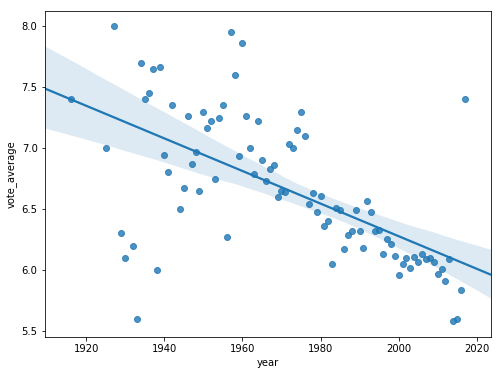

In [41]:
# с линей тренда (линейный)
sns.regplot(x='year',y='vote_average',data=year_vote, fit_reg=True) 

Для новых фильмов vote_average постепенно уменьшается.
Но при этом в период 1920-1970 гг. разброс показателя сильнее чем в период 1980-2010 гг.
В первый период выходило меньше фильмов в год, поэтому на показатель средней влияют очень высокие оценки культовых фильмов, либо отсутствие таковых в данный год. 
Во второй период из-за роста количества фильмов в год получаем более объективное среднее значение. Даже можно выделить период стабилизации показателя с 2000-2010 гг.
Также кол-во проголосовавших пользователей за фильмы в первый период ниже, что тоже искажает значение средней. Все-таки современные фильмы д.б. более популярны для зрителя.
Проверим это.

### Как ведет себя полказатель popularity?

In [26]:
year_pop = df_up.groupby(['year']).mean()['popularity'].reset_index()
year_pop.head(5)

,year,popularity
0,1916.0,3.232447
1,1925.0,0.785744
2,1927.0,32.351527
3,1929.0,1.396524
4,1930.0,8.484123


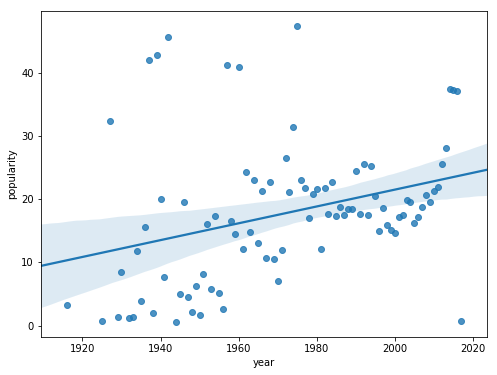

In [42]:
sns.regplot(x='year',y='popularity',data=year_pop, fit_reg=True) 

Для новых фильмов средний popularity увеличивается.
Этот также показатель подвержен большей вариативности в период 1920-1970, и меньшей в 1980-2010 гг. По тем же причинам, что и в первом случае.

#### 2. Ответим на вопрос степень связи между показателями vote_average и popularity

In [43]:
year_relat = df_up.groupby(['year']).agg({'popularity':['mean'], 'vote_average':['mean']})
year_relat.head(5)

,popularity,vote_average
,mean,mean
year,,
1916.0,3.232447,7.4
1925.0,0.785744,7.0
1927.0,32.351527,8.0
1929.0,1.396524,6.3
1930.0,8.484123,6.1


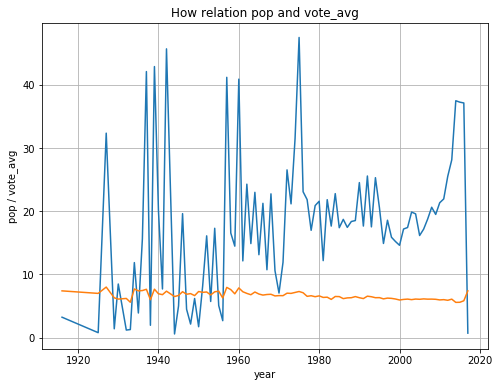

In [44]:
plt.plot(year_relat)
plt.xlabel('year')
plt.ylabel('pop / vote_avg')
plt.title('How relation pop and vote_avg')
plt.grid()

Увидели, что popularity и vote_average имеют разные порядки значений.
О степени связи из этого графика ничего сказать нельзя.
Найдем разницу значений

diff 3.5278554417700265


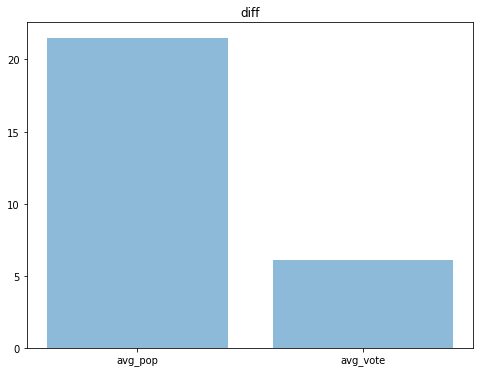

In [45]:
avg_pop = df_up['popularity'].mean()
avg_vote = df_up['vote_average'].mean()

objects = ('avg_pop', 'avg_vote')
y_pos = np.arange(len(objects))
performance = [avg_pop, avg_vote]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.title('diff')

print('diff', df_up['popularity'].mean()/df_up['vote_average'].mean())

In [46]:
year_relat['vote_average'] = year_relat['vote_average']*3.5

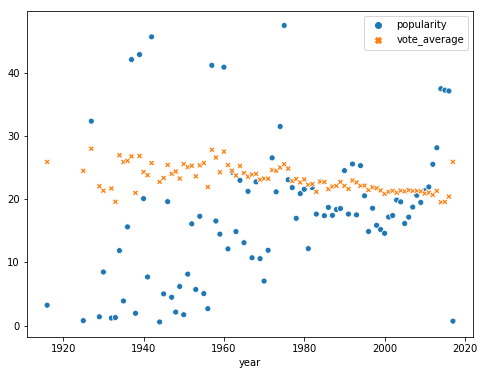

In [47]:
sns.scatterplot(data=year_relat)

Popularity и vote_average не показывают значимой связи друг с другом.

In [48]:
# что и подтвердил коэффициент линейной корреляции
year_pop.corr()

,year,popularity
year,1.000000,0.323844
popularity,0.323844,1.000000


#### 3. Покажем топ-10 самых дорогих фильмов

для этого budget приведем к ценам 1917 года, используя индекс потребительских цен США

In [49]:
cpi = pd.read_csv('cpi.csv')

In [50]:
cpi.head()

,year,cpi_%,cpi_1917_%
0,2017,2.11,1699.714513
1,2016,2.07,1662.525231
2,2015,0.73,1626.780867
3,2014,0.76,1614.266720
4,2013,1.50,1601.336562


In [51]:
print(type(cpi['year'][0]))
print(type(df_up['year'][0]))

<class 'numpy.int64'>
<class 'numpy.float64'>


In [52]:
df_up_join = df_up.merge(cpi, on='year', how='left')
df_up_join.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,tagline,title,vote_average,vote_count,country,director_name,release_year,year,cpi_%,cpi_1917_%
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Enter the World of Pandora.,Avatar,7.2,11800,United States of America,James Cameron,2009-12-10,2009.0,2.72,1476.514187
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,United States of America,Gore Verbinski,2007-05-19,2007.0,4.08,1433.388435
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,A Plan No One Escapes,Spectre,6.3,4466,United Kingdom,Sam Mendes,2015-10-26,2015.0,0.73,1626.780867


In [53]:
# проверка после merge
len(df_up) == len(df_up_join)

True

In [54]:
# бюджет приведенный к ценам 1917 года, в млн.$
df_up_join['budget_cpi'] = df_up_join['budget']/(1 + df_up_join['cpi_1917_%']/100)/1000000
df_up_join.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,country,director_name,release_year,year,cpi_%,cpi_1917_%,budget_cpi
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,United States of America,James Cameron,2009-12-10,2009.0,2.72,1476.514187,15.033166
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,United States of America,Gore Verbinski,2007-05-19,2007.0,4.08,1433.388435,19.564514
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,United Kingdom,Sam Mendes,2015-10-26,2015.0,0.73,1626.780867,14.188251


In [55]:
film_budget = df_up_join.sort_values('budget_cpi', ascending=False).head(10)

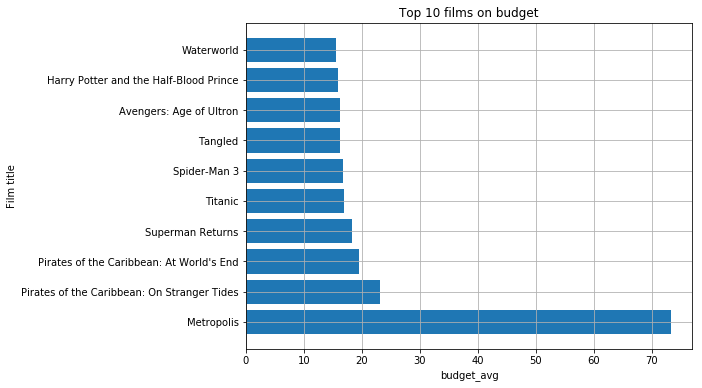

In [56]:
plt.barh(film_budget['title'], film_budget['budget_cpi'])
plt.xlabel('budget_avg')
plt.ylabel('Film title')
plt.title('Top 10 films on budget')
plt.grid()

In [57]:
# для того, чтобы посмотреть краткую информацию о фильмах-лидерах
film = df_up_join[df_up_join['title'] == input()].filter(items = ['country', 'director_name', 'year', 'budget_cpi', 'genres', 'keywords'])
film

Metropolis


,country,director_name,year,budget_cpi,genres,keywords
2638,Germany,Fritz Lang,1927.0,73.332157,Drama|Science Fiction,man vs machine|underground world|inventor|metr...


#### 4. Посмотрим на распределение длительности фильма по жанрам

In [66]:
# список названий жанров из датасета
genres = set()
for i in df_up['genres'].str.split('|'):
    genres = set().union(i, genres)
genres = list(genres)
genres

['',
 'Adventure',
 'Foreign',
 'Drama',
 'TV Movie',
 'History',
 'Mystery',
 'Horror',
 'Thriller',
 'Documentary',
 'Comedy',
 'Crime',
 'Family',
 'War',
 'Fantasy',
 'Animation',
 'Science Fiction',
 'Romance',
 'Music',
 'Action',
 'Western']

In [67]:
genres.remove('')
genres

['Adventure',
 'Foreign',
 'Drama',
 'TV Movie',
 'History',
 'Mystery',
 'Horror',
 'Thriller',
 'Documentary',
 'Comedy',
 'Crime',
 'Family',
 'War',
 'Fantasy',
 'Animation',
 'Science Fiction',
 'Romance',
 'Music',
 'Action',
 'Western']

In [68]:
# DFrame с необходимыми данными
genre_runtime = df_up[['id', 'title','year', 'country', 'genres', 'runtime']]
genre_runtime.head(3)

,id,title,year,country,genres,runtime
0,19995,Avatar,2009.0,United States of America,Action|Adventure|Fantasy|Science Fiction,162.0
1,285,Pirates of the Caribbean: At World's End,2007.0,United States of America,Adventure|Fantasy|Action,169.0
2,206647,Spectre,2015.0,United Kingdom,Action|Adventure|Crime,148.0


In [69]:
def genres_runtime(row):
    """Возвращает runtime, если он есть в списке жанров данного фильма"""
    
    return pd.Series([row['runtime'] if genre in row['genres'] else np.NaN for genre in genres])

In [70]:
# создаем столбцы жанров со значениеми runtime
genre_runtime[genres] = genre_runtime.apply(genres_runtime, axis=1)
genre_runtime.head()

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


,id,title,year,country,genres,runtime,Adventure,Foreign,Drama,TV Movie,...,Crime,Family,War,Fantasy,Animation,Science Fiction,Romance,Music,Action,Western
0,19995,Avatar,2009.0,United States of America,Action|Adventure|Fantasy|Science Fiction,162.0,162.0,NaN,NaN,NaN,...,NaN,NaN,NaN,162.0,NaN,162.0,NaN,NaN,162.0,NaN
1,285,Pirates of the Caribbean: At World's End,2007.0,United States of America,Adventure|Fantasy|Action,169.0,169.0,NaN,NaN,NaN,...,NaN,NaN,NaN,169.0,NaN,NaN,NaN,NaN,169.0,NaN
2,206647,Spectre,2015.0,United Kingdom,Action|Adventure|Crime,148.0,148.0,NaN,NaN,NaN,...,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,148.0,NaN
3,49026,The Dark Knight Rises,2012.0,United States of America,Action|Crime|Drama|Thriller,165.0,NaN,NaN,165.0,NaN,...,165.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165.0,NaN
4,49529,John Carter,2012.0,United States of America,Action|Adventure|Science Fiction,132.0,132.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,132.0,NaN,NaN,132.0,NaN


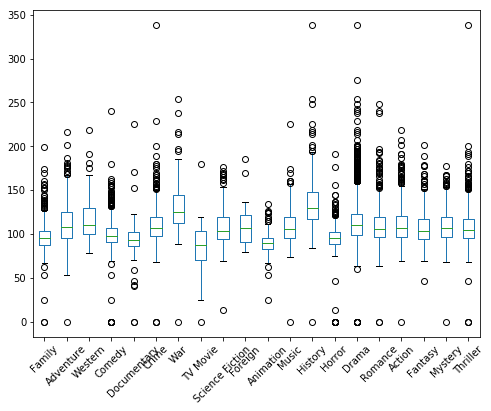

In [71]:
# box plot в matplotlib
genre_runtime[['Family',
               'Adventure',
               'Western',
               'Comedy',
               'Documentary',
               'Crime',
               'War',
               'TV Movie',
               'Science Fiction',
               'Foreign',
               'Animation',
               'Music',
               'History',
               'Horror',
               'Drama',
               'Romance',
               'Action',
               'Fantasy',
               'Mystery',
               'Thriller']].plot(kind='box', rot=45)

In [72]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [73]:
# box plot в plotly
data = []

for genre in genres:
    data.append(go.Box(y=genre_runtime[genre], name = genre)) 
iplot(data, show_link = False)

Медианная длительность фильмов около 110 минут (около 2 часов).
Ожидаемо ТВ фильмы и мутфильмы имеют меньшую продолжительность, а самыми длинными жанра "Исторические".
Есть небольшое кол-во фильмов с длительностью = 0.
И один фильм длительностью 5,6 часов в жанре Crime, History, Drama, Thriller - это фильм Carlos

In [74]:
def cheak_0(row):
    '''
    для подсчета фильмов с длительностью = 0 
    '''
    i = 0
    if row['runtime'] == 0:
        return 1
    else:
        return 0

In [76]:
cheak_runtime = genre_runtime.apply(cheak_0, axis=1)

In [78]:
# посчитали кол-во длительностью 0
cheak_runtime.value_counts().head()

0    4768
1      35
dtype: int64

In [80]:
long_films = genre_runtime[genre_runtime['runtime'] > 180].sort_values('runtime', ascending = False)

In [81]:
long_films_country = long_films.groupby('country').count()['id'].reset_index()

In [82]:
long_films_country.style.bar()

,country,id
0,France,1
1,Germany,1
2,India,4
3,Italy,1
4,Japan,1
5,New Zealand,2
6,Thailand,1
7,United Kingdom,6
8,United States of America,24


Кто снимает фильмы длительностью больше 3 часов:
США,
Великобритания,
Индия (что ожидаемо)

При этом кол-во таких фильмов не очень высокое

In [83]:
df_up['id'].count()

4803

In [84]:
long_films

,id,title,year,country,genres,runtime,Adventure,Foreign,Drama,TV Movie,...,Crime,Family,War,Fantasy,Animation,Science Fiction,Romance,Music,Action,Western
2384,43434,Carlos,2010.0,France,Crime|Drama|Thriller|History,338.0,NaN,NaN,338.0,NaN,...,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2631,112430,The Company,2007.0,NaN,Drama,276.0,NaN,NaN,276.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,10655,Gettysburg,1993.0,United States of America,War|Drama|History,254.0,NaN,NaN,254.0,NaN,...,NaN,NaN,254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1125,8095,Cleopatra,1963.0,United Kingdom,Drama|History|Romance,248.0,NaN,NaN,248.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,248.0,NaN,NaN,NaN
2373,10549,Hamlet,1996.0,United Kingdom,Drama,242.0,NaN,NaN,242.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3510,183894,Emma,2009.0,NaN,Romance|Comedy|Drama,240.0,NaN,NaN,240.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,NaN,NaN,NaN
3813,770,Gone with the Wind,1939.0,United States of America,Drama|Romance|War,238.0,NaN,NaN,238.0,NaN,...,NaN,NaN,238.0,NaN,NaN,NaN,238.0,NaN,NaN,NaN
1663,311,Once Upon a Time in America,1984.0,United States of America,Drama|Crime,229.0,NaN,NaN,229.0,NaN,...,229.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4497,9459,Woodstock,1970.0,United States of America,History|Documentary|Music,225.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,225.0,NaN,NaN
1109,10935,Heaven's Gate,1980.0,United States of America,Action|Drama|History|Western,219.0,NaN,NaN,219.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,219.0,219.0
